In [64]:
%matplotlib inline
import matplotlib
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as P
from matplotlib.colors import LogNorm
from astropy.io import fits as F
from astropy import units as u
from astropy.coordinates import SkyCoord
from calc_kcor import calc_kcor

In [65]:
data = Table.read('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_psf_petro_mag_galex_dr6_aper_5px', format='ascii', fill_values=[(' ', '-999')])

In [66]:
n = F.open('/Users/becky/Projects/followup_gv/oh_sample/SFD_dust_4096_ngp.fits')
s = F.open('/Users/becky/Projects/followup_gv/oh_sample/SFD_dust_4096_sgp.fits')

In [67]:
ngp = n[0].data
sgp = s[0].data

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


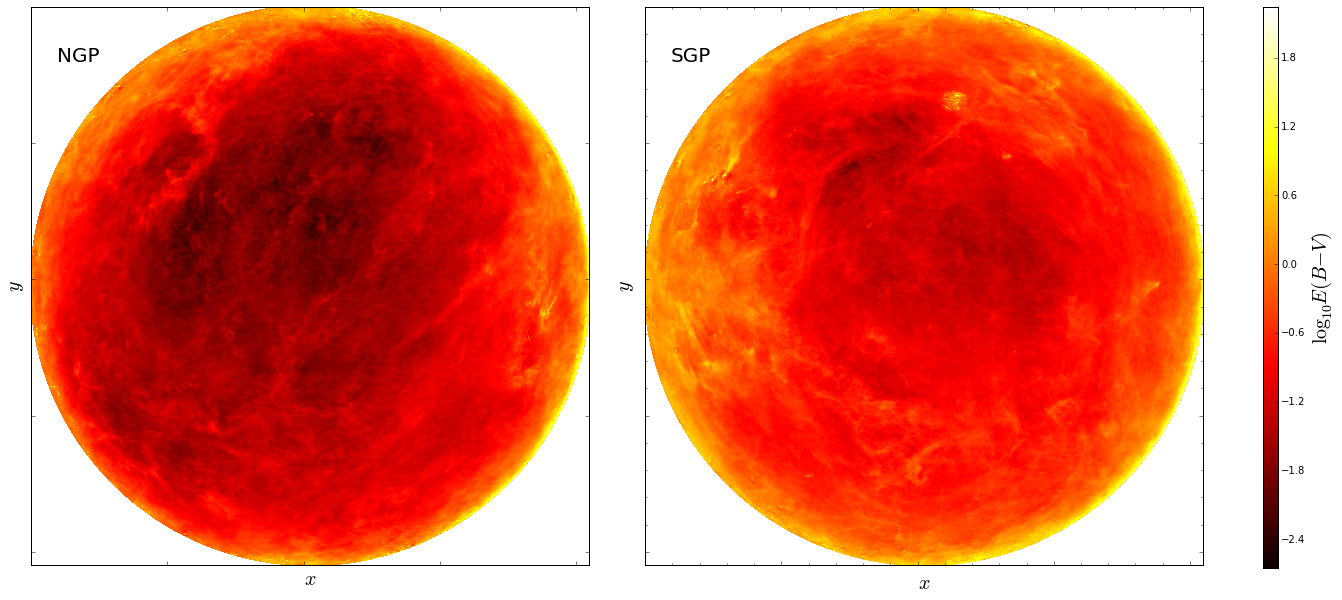

In [68]:
fig = P.figure(figsize=(22,10))
ax1 = P.subplot(121)
ax2 = P.subplot(122)
m1 = ax1.imshow(np.log10(ngp), cmap=P.cm.hot)
m2 = ax2.imshow(np.log10(sgp), cmap=P.cm.hot)
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r'$y$', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)
ax2.set_ylabel(r'$y$', fontsize=20)
ax1.text(200,400, 'NGP', fontsize=20)
ax2.text(200,400, 'SGP', fontsize=20)
ax1.tick_params('x', labelbottom='off')
ax1.tick_params('y', labelleft='off')
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
P.minorticks_on()
P.subplots_adjust(right=0.9, wspace=0.0)
cbar_ax = fig.add_axes([0.92, 0.12, 0.01, 0.78])
cb = fig.colorbar(m1, cax = cbar_ax)
cb.solids.set_edgecolor('face')
cb.set_label(r'$\log_{10 }E(B-V) \rm{~Schlegel ~et ~al. ~(1998)}$', fontsize=20)
P.savefig('SFD_ebv_maps.png', facecolor='None', edgecolor='None')

In [69]:
data['col15'].name = 'RA'
data['col16'].name = 'Dec'
data['RA'].unit = u.degree
data['Dec'].unit = u.degree
c = SkyCoord(ra=data['RA'], dec=data['Dec'])
b = Column(name='galactic b', data=c.galactic.b.radian, unit=u.radian)
l = Column(name='galactic l', data=c.galactic.l.radian, unit=u.radian)
data.add_column(l)
data.add_column(b)
print data

     col1           col2          col3    ...   galactic l     galactic b  
                                          ...      rad            rad      
------------- --------------- ----------- ... -------------- --------------
1.87045669556   1.44163131714  0.49078202 ... 0.590702953894 0.785767322014
1.33864974976 -0.170686721802  0.41628608 ...  0.85542481499 0.698714324052
1.72662162781   1.94728088379  0.33749172 ...  0.84995010442 0.717385653839
 1.4613609314   1.14869689941  0.39620167 ...  4.23622363298 0.997649900161
 2.0159072876   1.79521942139  0.33963156 ...  1.55923582992 0.885273964318
1.07579803467  0.883646011353  0.26668158 ...  4.95985938909  1.15693992379
1.26580238342   0.79125213623   0.0195086 ...  5.00077678747  1.15878100031
1.14369773865   1.56950950623   0.5789604 ... 0.477957320954  1.04784997589
1.61919212341  0.844255447388  0.02330217 ... 0.384064281308  1.18751001813
1.54740905762   1.03423309326       0.511 ... 0.401727018244  1.24742401107
          ..

In [70]:
def calc_xy_pos(l,b):
    if b > 0:
        n = +1
    else:
        n = -1
    x = 2048 * ((1-(n*np.sin(b)))**(0.5))*np.cos(l) + 2047.5
    y = (-1)*2048 * n * ((1-(n*np.sin(b)))**(0.5))*np.sin(l) + 2047.5
    return x, y

In [71]:
x = np.zeros(len(data))
y = np.zeros(len(data))
for n in range(len(data)):
    x[n], y[n] = calc_xy_pos(data['galactic l'][n], data['galactic b'][n])

x_i = Column(name='x', data=np.round(x, 0), dtype=int)
y_i = Column(name='y', data=np.round(y,0), dtype=int)
data.add_column(x_i)
data.add_column(y_i)

In [11]:
print data

     col1           col2          col3    ...   galactic b    x    y  
                                          ...      rad                
------------- --------------- ----------- ... -------------- ---- ----
1.87045669556   1.44163131714  0.49078202 ... 0.785767322014 2968 1430
1.33864974976 -0.170686721802  0.41628608 ... 0.698714324052 2850 1124
1.72662162781   1.94728088379  0.33749172 ... 0.717385653839 2839 1147
 1.4613609314   1.14869689941  0.39620167 ... 0.997649900161 1672 2775
 2.0159072876   1.79521942139  0.33963156 ... 0.885273964318 2059 1074
1.07579803467  0.883646011353  0.26668158 ...  1.15693992379 2193 2624
1.26580238342   0.79125213623   0.0195086 ...  1.15878100031 2216 2615
1.14369773865   1.56950950623   0.5789604 ...  1.04784997589 2712 1703
1.61919212341  0.844255447388  0.02330217 ...  1.18751001813 2559 1841
1.54740905762   1.03423309326       0.511 ...  1.24742401107 2477 1865
          ...             ...         ... ...            ...  ...  ...
1.5455

In [72]:
ebv = np.zeros(len(data))
for n in range(len(data)):
    if data['galactic b'][n] > 0:
        ebv[n] = ngp[data['y'][n], data['x'][n]]
    else:
        ebv[n] = sgp[data['y'][n], data['x'][n]]
ebvs = Column(name='E(B-V)', data=ebv, dtype=float)
data.add_column(ebvs)
print data

     col1           col2          col3    ...  x    y        E(B-V)    
                                          ...                          
------------- --------------- ----------- ... ---- ---- ---------------
1.87045669556   1.44163131714  0.49078202 ... 2968 1430 0.0406107977033
1.33864974976 -0.170686721802  0.41628608 ... 2850 1124 0.0316777043045
1.72662162781   1.94728088379  0.33749172 ... 2839 1147 0.0309276264161
 1.4613609314   1.14869689941  0.39620167 ... 1672 2775 0.0309021472931
 2.0159072876   1.79521942139  0.33963156 ... 2059 1074 0.0126125980169
1.07579803467  0.883646011353  0.26668158 ... 2193 2624  0.022884523496
1.26580238342   0.79125213623   0.0195086 ... 2216 2615  0.018519949168
1.14369773865   1.56950950623   0.5789604 ... 2712 1703 0.0523669831455
1.61919212341  0.844255447388  0.02330217 ... 2559 1841 0.0444258973002
1.54740905762   1.03423309326       0.511 ... 2477 1865 0.0250194426626
          ...             ...         ... ...  ...  ...         

In [73]:
a_ebv = [4.239, 3.303, 8.18] # [u, r, NUV]

In [74]:
u_red_cor = Column(name='u ext correction', data = a_ebv[0]*data['E(B-V)'], dtype=float, unit=u.mag)
r_red_cor = Column(name='r ext correction', data = a_ebv[1]*data['E(B-V)'], dtype=float, unit=u.mag)
nuv_red_cor = Column(name='NUV ext correction', data = a_ebv[2]*data['E(B-V)'], dtype=float, unit=u.mag)
data.add_columns([u_red_cor, r_red_cor, nuv_red_cor])
print data

     col1           col2      ... r ext correction NUV ext correction
                              ...       mag               mag        
------------- --------------- ... ---------------- ------------------
1.87045669556   1.44163131714 ...   0.134137464814     0.332196325213
1.33864974976 -0.170686721802 ...   0.104631457318      0.25912362121
1.72662162781   1.94728088379 ...   0.102153950052     0.252987984084
 1.4613609314   1.14869689941 ...   0.102069792509     0.252779564857
 2.0159072876   1.79521942139 ...  0.0416594112497     0.103171051778
1.07579803467  0.883646011353 ...  0.0755875811074     0.187195402198
1.26580238342   0.79125213623 ...  0.0611713921018     0.151493184194
1.14369773865   1.56950950623 ...    0.17296814533      0.42836192213
1.61919212341  0.844255447388 ...   0.146738738783     0.363403839916
1.54740905762   1.03423309326 ...  0.0826392191146      0.20465904098
          ...             ... ...              ...                ...
1.54553413391   0.83

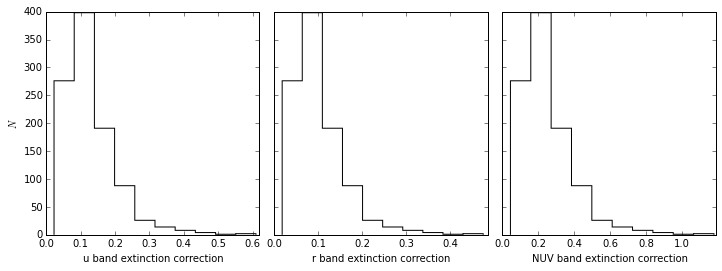

In [75]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(data['u ext correction'], histtype='step', color='k')
ax1.set_xlabel('u band extinction correction')
ax1.set_ylabel(r'$N$')
ax1.set_xlim(0, np.max(data['u ext correction'])+0.01)
ax2 = P.subplot(132)
ax2.hist(data['r ext correction'], histtype='step', color='k')
ax2.set_xlabel('r band extinction correction')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(0, np.max(data['r ext correction'])+0.01)
ax3 = P.subplot(133)
ax3.hist(data['NUV ext correction'], histtype='step', color='k')
ax3.set_xlabel('NUV band extinction correction')
ax3.set_xlim(0, np.max(data['NUV ext correction'])+0.01)
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('extinction_ebv_correction.png', facecolor='None', edgecolor='None')

In [76]:
data['col580'].name = 'nuv flux auto'
data['col581'].name = 'nuv flux auto err'
data['col554'].name = 'nuv flux 5px'
data['col561'].name = 'nuv flux 5px err'
data['col553'].name = 'nuv flux 3px'
data['col560'].name = 'nuv flux 3px err'
data['col375'].name = 'petro mag u'
data['col376'].name = 'petro mag u err'
data['col379'].name = 'petro mag r'
data['col380'].name = 'petro mag r err'
data['col385'].name = 'psf mag u'
data['col386'].name = 'psf mag u err'
data['col389'].name = 'psf mag r'
data['col390'].name = 'psf mag r err'

In [77]:
nuv_ab_auto = Column(name='nuv ab mag auto', data=(-2.5*np.log10(data['nuv flux auto'].quantity.value) + 20.08), dtype=float, unit=u.mag)
nuv_ab_auto_err = Column(name='nuv ab mag auto err', data=((1/np.log(10))*(data['nuv flux auto err'].quantity.value/data['nuv flux auto'].quantity.value)), dtype=float, unit=u.mag)
nuv_ab_5px = Column(name='nuv ab mag 5px', data=(-2.5*np.log10(data['nuv flux 5px'].quantity.value) + 20.08), dtype=float, unit=u.mag)
nuv_ab_5px_err = Column(name='nuv ab mag 5px err', data=((1/np.log(10))*(data['nuv flux 5px err'].quantity.value/data['nuv flux 5px'].quantity.value)), dtype=float, unit=u.mag)
nuv_ab_3px = Column(name='nuv ab mag 3px', data=(-2.5*np.log10(data['nuv flux 3px'].quantity.value) + 20.08), dtype=float, unit=u.mag)
nuv_ab_3px_err = Column(name='nuv ab mag 3px err', data=((1/np.log(10))*(data['nuv flux 3px err'].quantity.value/data['nuv flux 5px'].quantity.value)), dtype=float, unit=u.mag)

data.add_columns([nuv_ab_auto, nuv_ab_auto_err, nuv_ab_5px, nuv_ab_5px_err, nuv_ab_3px, nuv_ab_3px_err])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


In [78]:
idx = np.where(np.isnan(nuv_ab_auto))
data.remove_rows(idx)

19.1564876551
19.9191803371


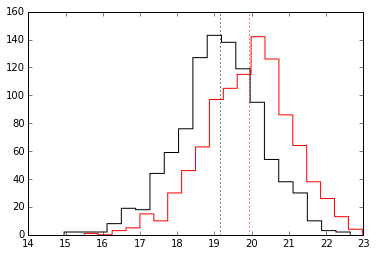

In [87]:
P.figure()
P.hist(data['nuv ab mag auto'], histtype='step', color='k', bins=20)
P.hist(data['nuv ab mag 5px'], histtype='step', color='r', bins=20)
P.axvline(np.mean(data['nuv ab mag auto']), color='k', linestyle='dotted')
P.axvline(np.mean(data['nuv ab mag 5px']), color='r', linestyle='dotted')
print np.mean(data['nuv ab mag auto'])
print np.mean(data['nuv ab mag 5px'])


In [88]:
data['col291'].name = 'redshift'

KeyError: 'col291'

In [89]:
petro_u_kcor_val = Column(name='petro u kcor value', data=(calc_kcor('u', data['redshift'].quantity.value, 'u - r', data['petro mag u'].quantity.value - data['petro mag r'].quantity.value)), dtype=float)
petro_r_kcor_val = Column(name='petro r kcor value', data=(calc_kcor('r', data['redshift'].quantity.value, 'u - r', data['petro mag u'].quantity.value - data['petro mag r'].quantity.value)), dtype=float)
petro_nuv_kcor_val = Column(name='petro nuv kcor value', data=(calc_kcor('NUV', data['redshift'].quantity.value, 'NUV - r', data['nuv ab mag auto'].quantity.value - data['petro mag r'].quantity.value)), dtype=float)
psf_u_kcor_val = Column(name='psf u kcor value', data=(calc_kcor('u', data['redshift'].quantity.value, 'u - r', data['psf mag u'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)
psf_r_kcor_val = Column(name='psf r kcor value', data=(calc_kcor('r', data['redshift'].quantity.value, 'u - r', data['psf mag u'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)
psf_nuv_kcor_val_5px = Column(name='psf nuv kcor value 5px', data=(calc_kcor('NUV', data['redshift'].quantity.value, 'NUV - r', data['nuv ab mag 5px'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)
psf_nuv_kcor_val_3px = Column(name='psf nuv kcor value 3px', data=(calc_kcor('NUV', data['redshift'].quantity.value, 'NUV - r', data['nuv ab mag 3px'].quantity.value - data['psf mag r'].quantity.value)), dtype=float)

data.add_columns([petro_u_kcor_val, petro_r_kcor_val, petro_nuv_kcor_val, psf_u_kcor_val, psf_r_kcor_val, psf_nuv_kcor_val_5px, psf_nuv_kcor_val_3px])

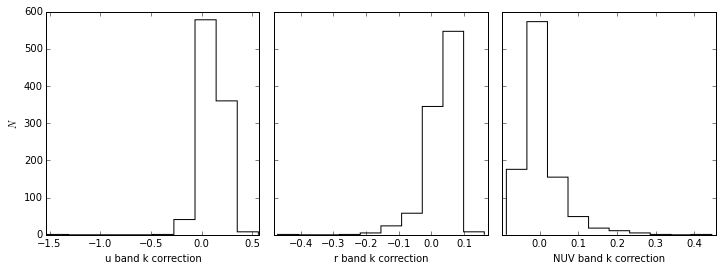

In [90]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(petro_u_kcor_val, histtype='step', color='k')
ax1.set_xlabel('u band k correction')
ax1.set_ylabel(r'$N$')
ax1.set_xlim(np.min(petro_u_kcor_val) - 0.01, np.max(petro_u_kcor_val)+0.01)
ax2 = P.subplot(132)
ax2.hist(petro_r_kcor_val, histtype='step', color='k')
ax2.set_xlabel('r band k correction')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(np.min(petro_r_kcor_val) - 0.01, np.max(petro_r_kcor_val)+0.01)
ax3 = P.subplot(133)
ax3.hist(petro_nuv_kcor_val, histtype='step', color='k')
ax3.set_xlabel('NUV band k correction')
ax3.set_xlim(np.min(petro_nuv_kcor_val) - 0.01,  np.max(petro_nuv_kcor_val)+0.01)
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('k_corrections.png', facecolor='None', edgecolor='None')

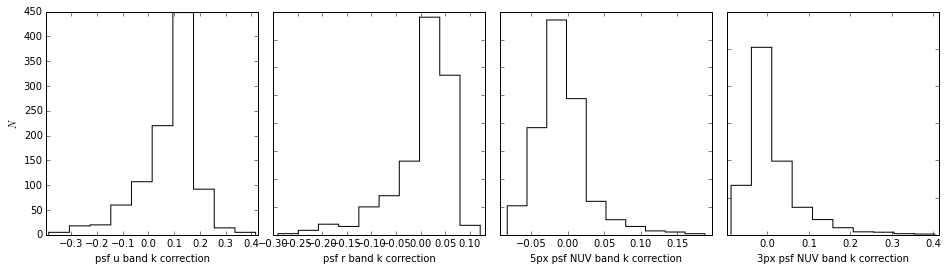

In [91]:
P.figure(figsize=(16,4))
ax1 = P.subplot(141)
ax1.hist(psf_u_kcor_val, histtype='step', color='k')
ax1.set_xlabel('psf u band k correction')
ax1.set_ylabel(r'$N$')
ax1.set_xlim(np.min(psf_u_kcor_val) - 0.01, np.max(psf_u_kcor_val)+0.01)
ax2 = P.subplot(142)
ax2.hist(psf_r_kcor_val, histtype='step', color='k')
ax2.set_xlabel('psf r band k correction')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(np.min(psf_r_kcor_val) - 0.01, np.max(psf_r_kcor_val)+0.01)
ax3 = P.subplot(143)
ax3.hist(psf_nuv_kcor_val_5px, histtype='step', color='k')
ax3.set_xlabel('5px psf NUV band k correction')
ax3.set_xlim(np.min(psf_nuv_kcor_val_5px) - 0.01,  np.max(psf_nuv_kcor_val_5px)+0.01)
ax3.tick_params('y', labelleft='off')
ax4 = P.subplot(144)
ax4.hist(psf_nuv_kcor_val_3px, histtype='step', color='k')
ax4.set_xlabel('3px psf NUV band k correction')
ax4.set_xlim(np.min(psf_nuv_kcor_val_3px) - 0.01,  np.max(psf_nuv_kcor_val_3px+0.01))
ax4.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('psf_band_kcorrection.png', facecolor='None', edgecolor='None')

In [92]:
petro_u_corr = Column(name='petro u corr', data=(data['petro mag u'].quantity.value - data['petro u kcor value'].quantity.value - data['u ext correction'].quantity.value), dtype=float, unit=u.mag)
petro_r_corr = Column(name='petro r corr', data=(data['petro mag r'].quantity.value - data['petro r kcor value'].quantity.value - data['r ext correction'].quantity.value), dtype=float, unit=u.mag)
petro_nuv_corr = Column(name='petro nuv corr', data=(data['nuv ab mag auto'].quantity.value - data['petro nuv kcor value'].quantity.value - data['NUV ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_u_corr = Column(name='psf u corr', data=(data['psf mag u'].quantity.value - data['psf u kcor value'].quantity.value - data['u ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_r_corr = Column(name='psf r corr', data=(data['psf mag r'].quantity.value - data['psf r kcor value'].quantity.value - data['r ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_nuv_5px_corr = Column(name='psf nuv 5px corr', data=(data['nuv ab mag 5px'].quantity.value - data['psf nuv kcor value 5px'].quantity.value - data['NUV ext correction'].quantity.value), dtype=float, unit=u.mag)
psf_nuv_3px_corr = Column(name='psf nuv 3px corr', data=(data['nuv ab mag 3px'].quantity.value - data['psf nuv kcor value 3px'].quantity.value - data['NUV ext correction'].quantity.value), dtype=float, unit=u.mag)

In [93]:
data.add_columns([petro_u_corr, petro_r_corr, petro_nuv_corr, psf_u_corr, psf_r_corr, psf_nuv_5px_corr, psf_nuv_3px_corr])

18.9002643047
19.6766254983


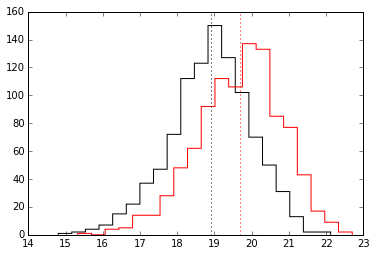

In [95]:
P.figure()
P.hist(data['petro nuv corr'], histtype='step', color='k', bins=20)
P.hist(data['psf nuv 5px corr'], histtype='step', color='r', bins=20)
P.axvline(np.mean(data['petro nuv corr']), color='k', linestyle='dotted')
P.axvline(np.mean(data['psf nuv 5px corr']), color='r', linestyle='dotted')
print np.mean(data['petro nuv corr'])
print np.mean(data['psf nuv 5px corr'])


In [98]:
nuv_gal_5px = Column(name='nuv gal 5px', data=(-2.5*np.log10((10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 5px corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
nuv_gal_5px_err = Column(name ='nuv gal 5px err', data=((1/(10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 5px corr'].quantity.value/-2.5)))*((((data['nuv ab mag auto err'].quantity.value*(10**(data['petro nuv corr'].quantity.value/-2.5)))**2)-((data['nuv ab mag 5px err'].quantity.value*(10**(data['psf nuv 5px corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)
nuv_gal_3px = Column(name='nuv gal 3px', data=(-2.5*np.log10((10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 3px corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
nuv_gal_3px_err = Column(name ='nuv gal 3px err', data=((1/(10**(data['petro nuv corr'].quantity.value/-2.5))-(10**(data['psf nuv 3px corr'].quantity.value/-2.5)))*((((data['nuv ab mag auto err'].quantity.value*(10**(data['petro nuv corr'].quantity.value/-2.5)))**2)-((data['nuv ab mag 3px err'].quantity.value*(10**(data['psf nuv 3px corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)
u_gal = Column(name='u gal', data=(-2.5*np.log10((10**(data['petro u corr'].quantity.value/-2.5))-(10**(data['psf u corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
u_gal_err = Column(name ='u gal err', data=((1/(10**(data['petro u corr'].quantity.value/-2.5))-(10**(data['psf u corr'].quantity.value/-2.5)))*((((data['petro mag r err'].quantity.value*(10**(data['petro r corr'].quantity.value/-2.5)))**2)-((data['psf mag r err'].quantity.value*(10**(data['psf r corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)
r_gal = Column(name='r gal', data=(-2.5*np.log10((10**(data['petro r corr'].quantity.value/-2.5))-(10**(data['psf r corr'].quantity.value/-2.5)))), dtype=float, unit=u.mag)
r_gal_err = Column(name ='r gal err', data=((1/(10**(data['petro r corr'].quantity.value/-2.5))-(10**(data['psf r corr'].quantity.value/-2.5)))*((((data['petro mag r err'].quantity.value*(10**(data['petro r corr'].quantity.value/-2.5)))**2)-((data['psf mag r err'].quantity.value*(10**(data['psf r corr'].quantity.value/-2.5)))**2))**(0.5))), dtype=float)

data.add_columns([nuv_gal_3px, nuv_gal_3px_err, nuv_gal_5px, nuv_gal_5px_err, u_gal, u_gal_err, r_gal, r_gal_err])

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


ValueError: Duplicate column names

In [97]:
idx = np.where(np.isnan(data['u gal'].quantity.value))[0]
data.remove_rows(idx)

In [103]:
def f(b, f0, m):
    return 2*b*f0*np.sinh((m/(2.5/np.log(10)))-np.log(b))

0.000522669596575
19.9268560671
19.7413470113
17.8062194333
18.7499228979
18.6836973785


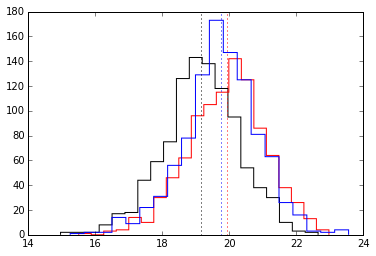

In [104]:
P.figure()
P.hist(data['nuv ab mag auto'], histtype='step', color='k', bins=20)
P.hist(data['nuv ab mag 5px'], histtype='step', color='r', bins=20)
P.hist(data['nuv gal 5px'], histtype='step', color='b', bins=20)
P.axvline(np.mean(data['nuv ab mag auto']), color='k', linestyle='dotted')
P.axvline(np.mean(data['nuv ab mag 5px']), color='r', linestyle='dotted')
P.axvline(np.mean(data['nuv gal 5px']), color='b', linestyle='dotted')
print f(1.4E-10, 3767*3E-15, np.mean(data['nuv ab mag auto']))
print np.mean(data['nuv ab mag 5px'])
print np.mean(data['nuv gal 5px'])
print np.mean(data['petro u corr'])
print np.mean(data['psf u corr'])
print np.mean(data['u gal'])

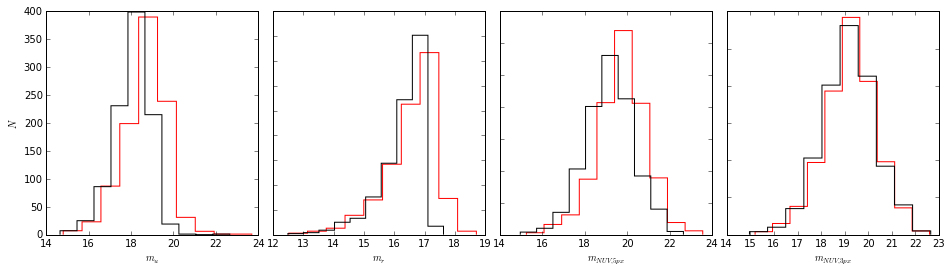

In [28]:
P.figure(figsize=(16,4))
ax1 = P.subplot(141)
ax1.hist(data['u gal'], histtype='step', color='r')
ax1.hist(data['petro mag u'], histtype='step', color='k')
ax1.set_xlabel(r'$m_u$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(142)
ax2.hist(data['r gal'], histtype='step', color='r')
ax2.hist(data['petro mag r'], histtype='step', color='k')
ax2.set_xlabel(r'$m_r$')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(143)
ax3.hist(data['nuv gal 5px'], histtype='step', color='r')
ax3.hist(data['nuv ab mag auto'], histtype='step', color='k')
ax3.set_xlabel(r'$m_{NUV, 5px}$')
ax3.tick_params('y', labelleft='off')
ax4 = P.subplot(144)
ax4.hist(data['nuv gal 3px'], histtype='step', color='r')
ax4.hist(data['nuv ab mag auto'], histtype='step', color='k')
ax4.set_xlabel(r'$m_{NUV, 3px}$')
ax4.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('comparison_magnitudes_before_after_agn_contribution_removal_and_kcorr.png' , facecolor='None', edgecolor='None')

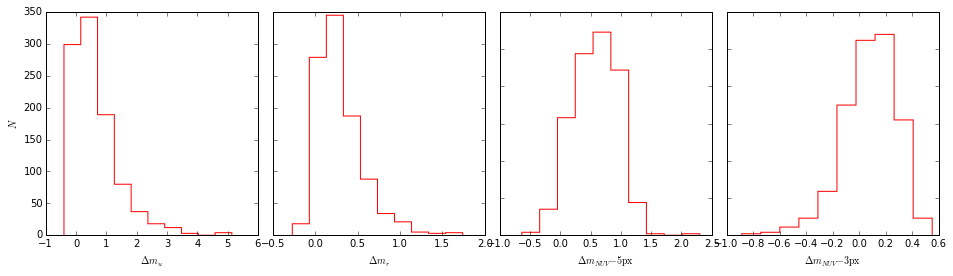

In [29]:
P.figure(figsize=(16,4))
ax1 = P.subplot(141)
ax1.hist(data['u gal'] - data['petro mag u'], histtype='step', color='r')
ax1.set_xlabel(r'$\Delta m_u$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(142)
ax2.hist(data['r gal'] - data['petro mag r'], histtype='step', color='r')
ax2.set_xlabel(r'$\Delta m_r$')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(143)
ax3.hist(data['nuv gal 5px'] - data['nuv ab mag auto'], histtype='step', color='r')
ax3.set_xlabel(r'$\Delta m_{NUV} - \rm{5px}$')
ax3.tick_params('y', labelleft='off')
ax4 = P.subplot(144)
ax4.hist(data['nuv gal 3px'] - data['nuv ab mag auto'], histtype='step', color='r')
ax4.set_xlabel(r'$\Delta m_{NUV} - \rm{3px}$')
ax4.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('delta_magnitudes_before_after_agn_contribution_removal_and_kcorr.png' , facecolor='None', edgecolor='None')

In [30]:
u_r = Column(name='u - r', data=(data['u gal'].quantity.value - data['r gal'].quantity.value), dtype=float, unit=u.mag)
u_r_err = Column(name = 'u - r err', data=(((data['u gal err'].quantity.value)**2 + (data['r gal err'].quantity.value)**2)**(0.5)), dtype=float, unit=u.mag)
nuv_u_5px = Column(name='nuv - u 5px', data=(data['nuv gal 5px'].quantity.value - data['u gal'].quantity.value), dtype=float, unit=u.mag)
nuv_u_5px_err = Column(name = 'nuv - u 5px err', data=(((data['u gal err'].quantity.value)**2 + (data['nuv gal 5px err'].quantity.value)**2)**(0.5)), dtype=float, unit=u.mag)
nuv_u_3px = Column(name='nuv - u 3px', data=(data['nuv gal 3px'].quantity.value - data['u gal'].quantity.value), dtype=float, unit=u.mag)
nuv_u_3px_err = Column(name = 'nuv - u 3px err', data=(((data['u gal err'].quantity.value)**2 + (data['nuv gal 3px err'].quantity.value)**2)**(0.5)), dtype=float, unit=u.mag)

data.add_columns([u_r, u_r_err, nuv_u_3px, nuv_u_3px_err, nuv_u_5px, nuv_u_5px_err])

In [31]:
data['u - r err'][np.isnan(data['u - r err']) == True] = np.mean(data['u - r err'][np.isnan(data['u - r err'])==False])
data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err']) == True] = np.mean(data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err'])==False])
data['nuv - u 5px err'][np.isnan(data['nuv - u 3px err']) == True] = np.mean(data['nuv - u 3px err'][np.isnan(data['nuv - u 3px err'])==False])

In [32]:
data['nuv - u 3px err'][np.isnan(data['nuv - u 3px err']) == True] = np.mean(data['nuv - u 3px err'][np.isnan(data['nuv - u 3px err']) == False])

In [33]:
data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err']) == True] = np.mean(data['nuv - u 5px err'][np.isnan(data['nuv - u 5px err']) == False])

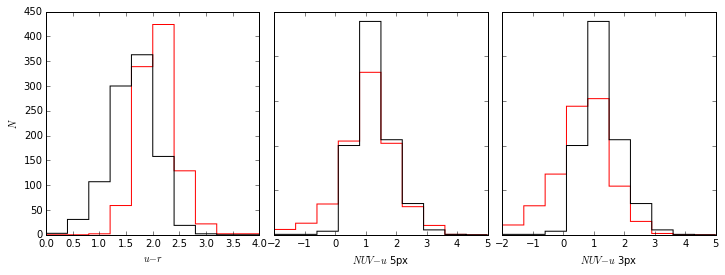

In [34]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(data['u - r'], histtype='step', color='r', range=(0,4))
ax1.hist(data['col335'], histtype='step', color='k', range=(0,4))
ax1.set_xlabel(r'$u - r$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(132)
ax2.hist(data['nuv - u 5px'], histtype='step', color='r', range=(-2,5))
ax2.hist(data['col337'], histtype='step', color='k', range=(-2,5))
ax2.set_xlabel(r'$NUV - u$ 5px')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.hist(data['nuv - u 3px'], histtype='step', color='r', range=(-2,5))
ax3.hist(data['col337'], histtype='step', color='k', range=(-2,5))
ax3.set_xlabel(r'$NUV - u$ 3px')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('colour_comparison_before_after_agn_contribution_removal_and_kcorr.png', facecolor='None', edgecolor='None')

In [353]:
print np.median(data['u - r'])
print np.mean(data['u - r'])
print np.median(data['u - r err'])
print np.mean(data['u - r err'])
print np.median(data['nuv - u 5px'])
print np.mean(data['nuv - u 5px'])
print np.median(data['nuv - u 5px err'])
print np.mean(data['nuv - u 5px err'])

2.08973588552
2.10891159524
0.0487202060655
0.128770115335
1.16325267008
1.05764963282
0.0579709176603
0.135078243818


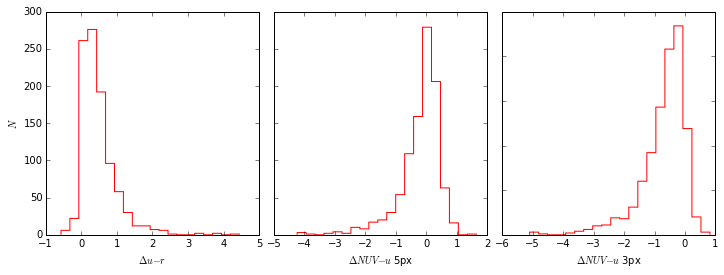

In [35]:
P.figure(figsize=(12,4))
ax1 = P.subplot(131)
ax1.hist(data['u - r'] - data['col335'], histtype='step', color='r', bins=20)
ax1.set_xlabel(r'$\Delta u - r$')
ax1.set_ylabel(r'$N$')
ax2 = P.subplot(132)
ax2.hist(data['nuv - u 5px'] - data['col337'], histtype='step', color='r', bins=20)
ax2.set_xlabel(r'$ \Delta NUV - u$ 5px')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.hist(data['nuv - u 3px'] - data['col337'], histtype='step', color='r', bins=20)
ax3.set_xlabel(r'$\Delta NUV - u$ 3px')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.07)
P.savefig('delta_colour_before_after_agn_contribution_removal_and_kcorr.png', facecolor='None', edgecolor='None')

In [342]:
print np.median(data['u - r'] - data['col335'])

0.352428148599


In [36]:
from scipy.stats import kde

In [106]:
h = np.load('galaxy_data_extra_agn_oh_sample_match_header.npy')

In [279]:
X, Y = np.mgrid[0:4:100j, -2:5:100j]
pos = np.vstack([X.ravel(), Y.ravel()])
density = kde.gaussian_kde(np.vstack([h[:,334].astype(float), h[:,336].astype(float)]))
kernel = np.reshape(density(pos).T, X.shape)

In [191]:
den_agn_pre = kde.gaussian_kde(np.vstack([data['col335'], data['col337']]))
kernel_agn_pre = np.reshape(den_agn_pre(pos).T, X.shape)
den_agn_5px = kde.gaussian_kde(np.vstack([data['u - r'], data['nuv - u 5px']]))
kernel_agn_5px = np.reshape(den_agn_5px(pos).T, X.shape)
den_agn_3px = kde.gaussian_kde(np.vstack([data['u - r'], data['nuv - u 3px']]))
kernel_agn_3px = np.reshape(den_agn_3px(pos).T, X.shape)

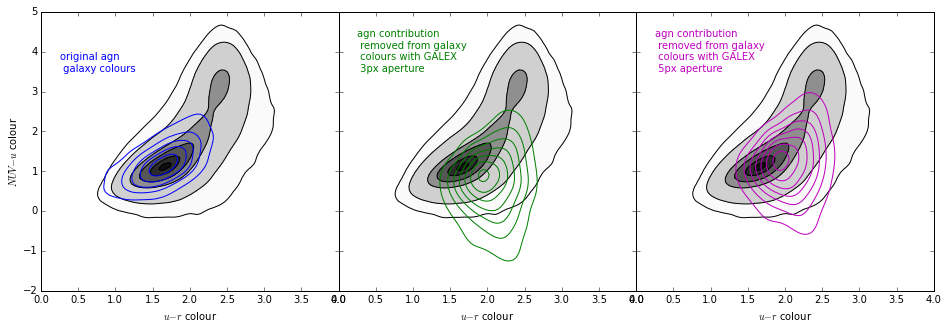

In [47]:
P.figure(figsize=(16,5))
ax1 = P.subplot(131)
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax1.contour(X,Y, kernel_agn_pre, colors='b', label ='original agn colours')
ax1.set_xlabel(r'$u-r$ colour')
ax1.set_ylabel(r'$NUV - u$ colour')
P.text(0.25, 3.5, 'original agn \n galaxy colours', color='b')
ax2 = P.subplot(132)
ax2.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax2.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax2.contour(X,Y, kernel_agn_3px, colors='g', label ='agn contribution removed with GALEX 3px')
ax2.set_xlabel(r'$u-r$ colour')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 3px aperture', color='g')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax3.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax3.contour(X,Y, kernel_agn_5px, colors='m', label ='agn contribution removed with GALEX 5px')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 5px aperture', color='m')
ax3.set_xlabel(r'$u-r$ colour')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.0)
P.savefig('colour_colour_comparison_before_after_agn_contribution_removal.png', facecolor='None', edgecolor='None')

In [84]:
f = open('params.3px.txt', 'a')
for n in range(len(data)):
    f.write('python glamdring_run.py '+str(data['u - r'][n])+' '+str(data['u - r err'][n])+' '+str(data['nuv - u 3px'][n])+' '+str(data['nuv - u 3px err'][n])+' '+str(data['redshift'][n])+' '+str(data['col4'][n])+' '+str(data['col3'][n])+' '+str('%18i' % data['col14'][n])+' '+str(data['RA'][n])+' '+str(data['Dec'][n])+'\n')

f.close()

In [85]:
f = open('params.5px.txt', 'a')
for n in range(len(data)):
    f.write('python glamdring_run.py '+str(data['u - r'][n])+' '+str(data['u - r err'][n])+' '+str(data['nuv - u 5px'][n])+' '+str(data['nuv - u 5px err'][n])+' '+str(data['redshift'][n])+' '+str(data['col4'][n])+' '+str(data['col3'][n])+' '+str('%18i' % data['col14'][n])+' '+str(data['RA'][n])+' '+str(data['Dec'][n])+'\n')

f.close()

In [42]:
data.write('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_gal_mag_5px_3px.fits', format='fits')

In [3]:
r_data = Table.read('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_gal_mag_5px_3px_petro90pc_radius.fits', format='fits')

In [10]:
print np.std(r_data['nuv - u 5px'])
print np.std(r_data['u - r'])

0.984108882524
0.413495901837


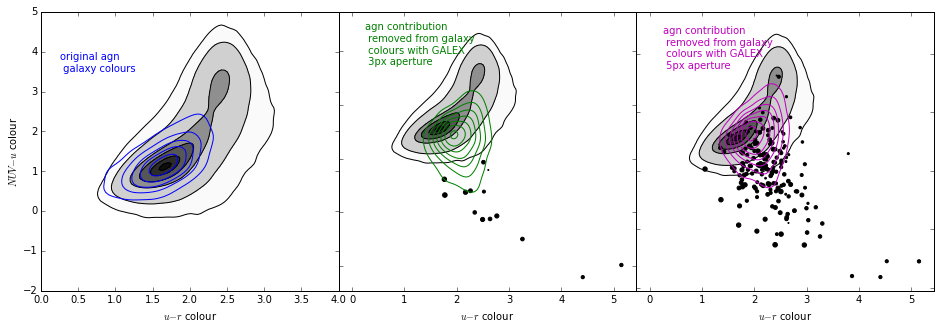

In [98]:
lt7 = r_data[np.where(2*r_data['petroR90_u'] < 7)]
lt45 = r_data[np.where(2*r_data['petroR90_u'] < 4.5)]
xs = lt7['col362']
lum = 1 + (xs-np.min(xs))*20/(np.max(xs)-np.min(xs))

xs = lt45['col362']
lum3 = 1 + (xs-np.min(xs))*20/(np.max(xs)-np.min(xs))

P.figure(figsize=(16,5))
ax1 = P.subplot(131)
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax1.contour(X,Y, kernel_agn_pre, colors='b', label ='original agn colours')
ax1.set_xlabel(r'$u-r$ colour')
ax1.set_ylabel(r'$NUV - u$ colour')
P.text(0.25, 3.5, 'original agn \n galaxy colours', color='b')
ax2 = P.subplot(132)
ax2.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax2.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax2.contour(X,Y, kernel_agn_3px, colors='g', label ='agn contribution removed with GALEX 3px')
ax2.set_xlabel(r'$u-r$ colour')
ax2.scatter(lt45['u - r'], lt45['nuv - u 3px'], color='k', marker='o', s=lum3)
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 3px aperture', color='g')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax3.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax3.contour(X,Y, kernel_agn_5px, colors='m', label ='agn contribution removed with GALEX 5px')
ax3.scatter(lt7['u - r'], lt7['nuv - u 5px'], color='k', marker='o', s = lum)
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 5px aperture', color='m')
ax3.set_xlabel(r'$u-r$ colour')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.0)
P.savefig('colour_colour_comparison_before_after_agn_contribution_removal_petroR90.png', facecolor='None', edgecolor='None')

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ValueError: zero-size array to reduction operation minimum which has no identity

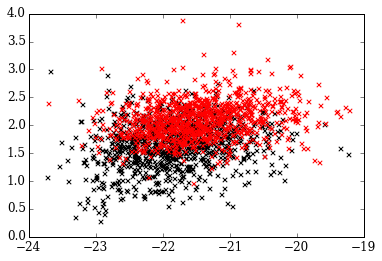

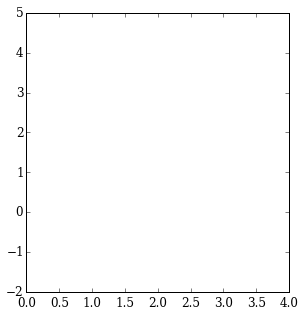

In [188]:
D_L_term = data['col283'] - data['col297']
abs_m_gal = data['r gal'] - D_L_term

X, Y = np.mgrid[0:4:100j, -2:5:100j]
pos = np.vstack([X.ravel(), Y.ravel()])
density = kde.gaussian_kde(np.vstack([data['col297'], data['col335']]))
print density
kernel = np.reshape(density(pos).T, X.shape)
print kernel

P.scatter(data['col297'], data['col335'], color='k', marker='x')
P.scatter(abs_m_gal, data['u - r'], color='r', marker='x')
P.xlim(-24, -19)
P.ylim(0,4)
den_agn_pre = kde.gaussian_kde(np.vstack([data['col297'], data['col335']]))
kernel_agn_pre = np.reshape(den_agn_pre(pos).T, X.shape)
den_agn_5px = kde.gaussian_kde(np.vstack([abs_m_gal, data['u - r']]))
kernel_agn_5px = np.reshape(den_agn_5px(pos).T, X.shape)
den_agn_3px = kde.gaussian_kde(np.vstack([abs_m_gal, data['u - r']]))
kernel_agn_3px = np.reshape(den_agn_3px(pos).T, X.shape)

P.figure(figsize=(16,5))
ax1 = P.subplot(131)
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax1.contour(X,Y, kernel_agn_pre, colors='b', label ='original agn colours')
ax1.set_xlabel(r'$M_r')
ax1.set_ylabel(r'$u -r$ colour')
P.text(0.25, 3.5, 'original agn \n galaxy colours', color='b')
ax2 = P.subplot(132)
ax2.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax2.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax2.contour(X,Y, kernel_agn_3px, colors='g', label ='agn contribution removed with GALEX 3px')
ax2.set_xlabel(r'$M_r$')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 3px aperture', color='g')
ax2.tick_params('y', labelleft='off')
ax3 = P.subplot(133)
ax3.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8])
ax3.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9])
ax3.contour(X,Y, kernel_agn_5px, colors='m', label ='agn contribution removed with GALEX 5px')
P.text(0.25, 3.5, 'agn contribution \n removed from galaxy \n colours with GALEX \n 5px aperture', color='m')
ax3.set_xlabel(r'$M_r$')
ax3.tick_params('y', labelleft='off')
P.subplots_adjust(wspace=0.0)
P.savefig('colour_colour_comparison_before_after_agn_contribution_removal_petroR90.png', facecolor='None', edgecolor='None')

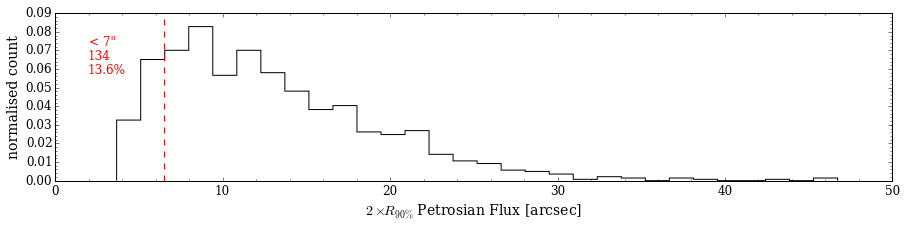

In [181]:
num = len(r_data[np.where(2*r_data['petroR90_u'] < 6.5)])
P.figure(figsize=(15,3))
P.hist(2*r_data['petroR90_u'], color='k', histtype='step', bins=30, normed=True)
P.axvline(6.5, color='r', linestyle='dashed')
P.text(2, 0.0725, '< 7"', color='r')
P.text(2, 0.065, str(num), color='r')
P.text(2, 0.0575, '%3.1f' % ((num/float(len(r_data))*100))+'%', color='r')
P.minorticks_on()
P.xlabel(r'$2 \times R_{90\%}$ Petrosian Flux [arcsec]', fontsize=14)
P.ylabel('normalised count', fontsize=14)
P.savefig('hist_number_galaxies_less_7arcsec_size.pdf')

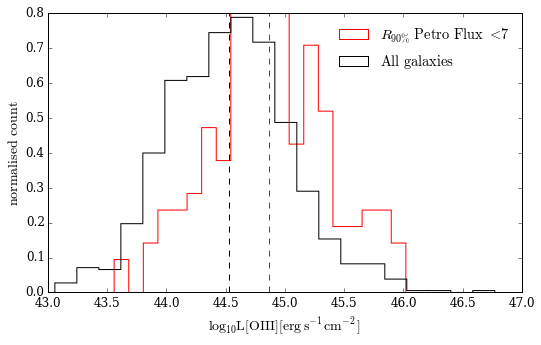

In [147]:
font = {'family':'serif', 'size':12}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')
P.figure(figsize=(8.5,5))
P.hist(lt7['col362'], histtype='step', color='r', normed=True, bins=20, label=r'$R_{90\%}$ $\rm{Petro}$ $\rm{Flux}$ $< 7"$')
P.hist(r_data['col362'], histtype='step', color='k', normed=True, bins=20, label=r'$\rm{All}$ $\rm{galaxies}$')
P.axvline(np.mean(lt7['col362']), linestyle='dashed', c='r')
P.axvline(np.mean(r_data['col362']), linestyle='dashed', c='k')
P.xlabel(r'$\rm{log_{10}} L[OIII] \rm{[erg^{}_{ }s^{-1}cm^{-2}]}$ ', fontsize=14)
P.ylabel(r'$\rm{normalised}$ $\rm{count}$', fontsize=14)
P.legend(frameon=False)
P.savefig('histogram_luminosity_r90_lt_7.pdf')

    r gal     
     mag      
--------------
-21.1534584337
-20.8283112779
-21.2286952763
-22.3528424829
-21.0149407375
-20.7086309224
-21.7706390104
-21.9212479661
-21.8311981962
-22.3123569403
           ...
-22.0002360012
-20.5183951114
-21.9952026477
-21.8381698717
-20.8545717959
-21.1715401758
-21.4559650101
-20.3233975023
-21.3158418557
-21.6713696427
Length = 984 rows
[ 10.52978752  10.49758711  10.60236811  10.84543133  10.40718028
  10.35426144  10.58965318  10.65742318  10.78150261  10.97366422
  10.60497312  10.98309212  10.84724063  10.40586949  10.61636521
  10.23663601  10.74796857  10.51528823  10.36582345  10.92947074
  10.96960059  10.34342267  10.49432951  10.8100324   10.2924539
  10.8672378   10.26853732  10.85937988  10.54135805  10.93280183
  10.75320876  10.59409657  10.66678513  10.47083023  10.84693582
  10.49530711  10.52417966  10.62278083  10.51661902  10.39605417
  10.76152405  10.49706361  10.64542406  10.66569991  10.96416323
  10.09647867  10.844434    1

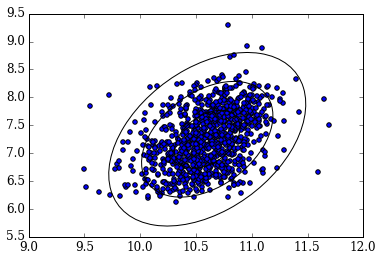

In [153]:
D_L_term = r_data['col283'] - r_data['col297'] #5(log10(DL)-1) = m - M
abs_m_gal = r_data['r gal'] - D_L_term
ur_gal = r_data['u - r']
print abs_m_gal
log_m_l = np.zeros(len(ur_gal))
m_msun = np.zeros_like(log_m_l)

for j in range(len(log_m_l)):
    if ur_gal[j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * ur_gal[j]
    else:
        log_m_l[j] = -0.16 + 0.18 * ur_gal[j]
    m_msun[j] = (((4.62 - abs_m_gal[j])/2.5) + log_m_l[j])
print m_msun

from matplotlib.patches import Ellipse
cov = np.cov(m_msun, r_data['col359'])
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
P.figure()
ax = P.subplot(111)
for j in xrange(1, 4):
    ell = Ellipse(xy=(np.mean(m_msun), np.mean(r_data['col359'])),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
P.scatter(m_msun, r_data['col359'])

In [282]:
h[:,296]

array(['-22.270242691', '-23.7223072052', '-20.6460952759', ...,
       '-19.0649795532', '-22.9669589996', '-22.1799449921'], 
      dtype='|S32')

(array([  44.,  534.,  373.,   26.,    2.,    2.,    1.,    1.,    0.,    1.]),
 array([ 0.94883466,  1.55755291,  2.16627116,  2.77498942,  3.38370767,
         3.99242592,  4.60114418,  5.20986243,  5.81858068,  6.42729894,
         7.03601719]),
 <a list of 10 Patch objects>)

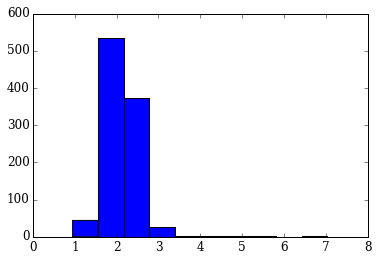

In [308]:
D_L_term = data['col283'] - data['col297']
abs_m_gal = data['r gal'] - D_L_term
P.hist(data['u - r'])

In [ ]:
X2, Y2 = np.mgrid[-24:-17:100j, 0:4:100j]
pos2 = np.vstack([X2.ravel(), Y2.ravel()])
density2 = kde.gaussian_kde(np.vstack([h[:,296].astype(float), h[:,334].astype(float)]))
print density
kernel2 = np.reshape(density2(pos2).T, X2.shape)

In [314]:
den_agn_5px_2 = kde.gaussian_kde(np.vstack([abs_m_gal, data['u - r']]))
kernel_agn_5px_2 = np.reshape(den_agn_5px_2(pos2).T, X2.shape)
print np.max(kernel_agn_5px_2)

0.612223028884


In [287]:
H, Xs, Ys = np.histogram2d(h[:,296].astype(float), h[:,334].astype(float), bins=50)


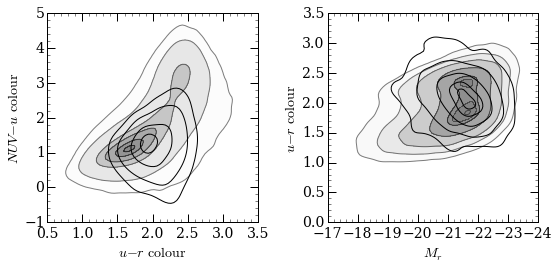

In [335]:
m = np.max(kernel_agn_5px_2.flatten())
P.figure(figsize=(8,4))
ax1 = P.subplot(121)
ax1.contour(X,Y, kernel_agn_5px, colors='k', levels=[0.16*m, 0.34*m, 0.68*m, 0.9*m, 0.98*m])
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8], alpha=0.5)
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9], alpha=0.5)
ax1.set_xlabel(r'$u-r$ $\rm{colour}$', fontsize=14)
ax1.set_ylabel(r'$NUV -u$ $\rm{colour}$', fontsize=14)
ax1.set_ylim(-1,5)
ax1.set_xlim(0.5, 3.5)
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax2 = P.subplot(122)
#ax2.contour(Xs[:-1], Ys[:-1], H.T, origin='lower', colors='k')
ax2.contour(X2,Y2, kernel2, colors='k', levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.34], alpha=0.5)
ax2.contourf(X2,Y2, kernel2, cmap=P.cm.binary, levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.32, 0.35], alpha=0.5)
ax2.contour(X2,Y2, kernel_agn_5px_2, colors='k', levels=[0.02, 0.1, 0.3, 0.5, 0.59])
ax2.set_xlabel(r'$M_r$', fontsize=14)
ax2.set_ylabel(r'$u-r$ $\rm{colour}$', fontsize=14)
ax2.set_ylim(0.0, 3.5)
ax2.set_xlim(-17, -24)
ax2.minorticks_on()
ax2.tick_params('both', which='major', length=8, width=1)
ax2.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('colour_colour_mag_comparison_agn_inactive.png', facecolor='None', edgecolor='None')

In [329]:
abs_m_d = abs_m_gal[np.where(data['col4'] > 0.5)]
abs_m_s = abs_m_gal[np.where(data['col3'] > 0.5)]
ur_d = data['u - r'][np.where(data['col4'] > 0.5)]
ur_s = data['u - r'][np.where(data['col3'] > 0.5)]
nuv_d = data['nuv - u 5px'][np.where(data['col4'] > 0.5)]
nuv_s = data['nuv - u 5px'][np.where(data['col3'] > 0.5)]

den_agn_5px_d = kde.gaussian_kde(np.vstack([abs_m_d, ur_d]))
kernel_agn_5px_d = np.reshape(den_agn_5px_d(pos2).T, X2.shape)
print np.max(kernel_agn_5px_d)

den_agn_5px_s = kde.gaussian_kde(np.vstack([abs_m_s, ur_s]))
kernel_agn_5px_s = np.reshape(den_agn_5px_s(pos2).T, X2.shape)
print np.max(kernel_agn_5px_s)

den_agn_5px_nuvu_d = kde.gaussian_kde(np.vstack([ur_d, nuv_d]))
kernel_agn_5px_nuvu_d = np.reshape(den_agn_5px_nuvu_d(pos).T, X.shape)
print np.max(kernel_agn_5px_nuvu_d)

den_agn_5px_nuvu_s = kde.gaussian_kde(np.vstack([ur_s, nuv_s]))
kernel_agn_5px_nuvu_s = np.reshape(den_agn_5px_nuvu_s(pos).T, X.shape)
print np.max(kernel_agn_5px_nuvu_s)

0.800070006852
0.472749553471
0.812901291203
0.356942758755


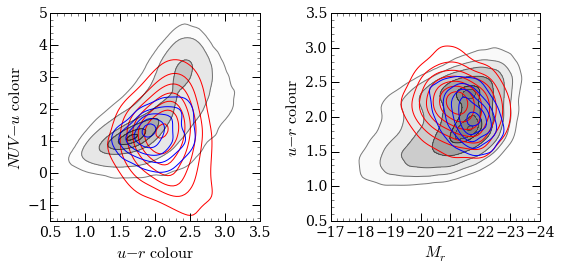

In [338]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')

P.figure(figsize=(8,4))
ax1 = P.subplot(121)
ax1.contour(X,Y, kernel_agn_5px_nuvu_s, colors='r')
ax1.contour(X,Y, kernel_agn_5px_nuvu_d, colors='b')
ax1.contour(X,Y, kernel, colors='k', levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8], alpha=0.5)
ax1.contourf(X,Y, kernel, cmap=P.cm.binary, levels=[0.01, 0.05, 0.3, 0.5, 0.7, 0.8, 0.9], alpha=0.5)
ax1.set_xlabel(r'$u-r$ $\rm{colour}$', fontsize=16)
ax1.set_ylabel(r'$NUV -u$ $\rm{colour}$', fontsize=16)
ax1.set_ylim(-1.5,5)
ax1.set_xlim(0.5, 3.5)
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax2 = P.subplot(122)
#ax2.contour(Xs[:-1], Ys[:-1], H.T, origin='lower', colors='k')
ax2.contour(X2,Y2, kernel2, colors='k', levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.34], alpha=0.5)
ax2.contourf(X2,Y2, kernel2, cmap=P.cm.binary, levels=[0.02, 0.05, 0.1, 0.2, 0.3, 0.32, 0.35], alpha=0.5)
ax2.contour(X2,Y2, kernel_agn_5px_s, colors='r')
ax2.contour(X2,Y2, kernel_agn_5px_d, colors='b')
ax2.set_xlabel(r'$M_r$', fontsize=16)
ax2.set_ylabel(r'$u-r$ $\rm{colour}$', fontsize=16)
ax2.set_ylim(0.5, 3.5)
ax2.set_xlim(-17, -24)
ax2.minorticks_on()
ax2.tick_params('both', which='major', length=8, width=1)
ax2.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('colour_colour_mag_comparison_agn_inactive.pdf', facecolor='None', edgecolor='None')

In [13]:
import pyfits as F
psf1 = F.open('/Users/becky/Projects/int_reduc/Q186225/Q186225_psf_u_iraf.fit')

In [17]:
p1 = psf1[0].data

In [33]:
ps1 = np.sum(p1, axis=1)

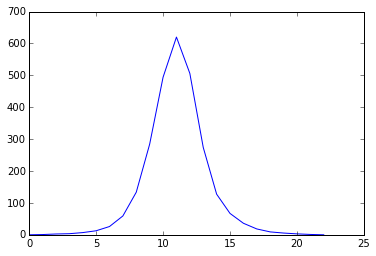

In [22]:
def psf(x, a, u, sig):
    return a*np.exp(-0.5*(((x-u)**2)/(2*sig**2)))

In [62]:
x = np.linspace(0, 25, 100)
t = psf(x, np.max(p1[12,:]), 10.8, 1.14)

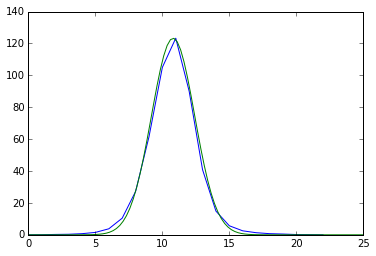

In [63]:
P.plot(p1[12,:])
P.plot(x, t)

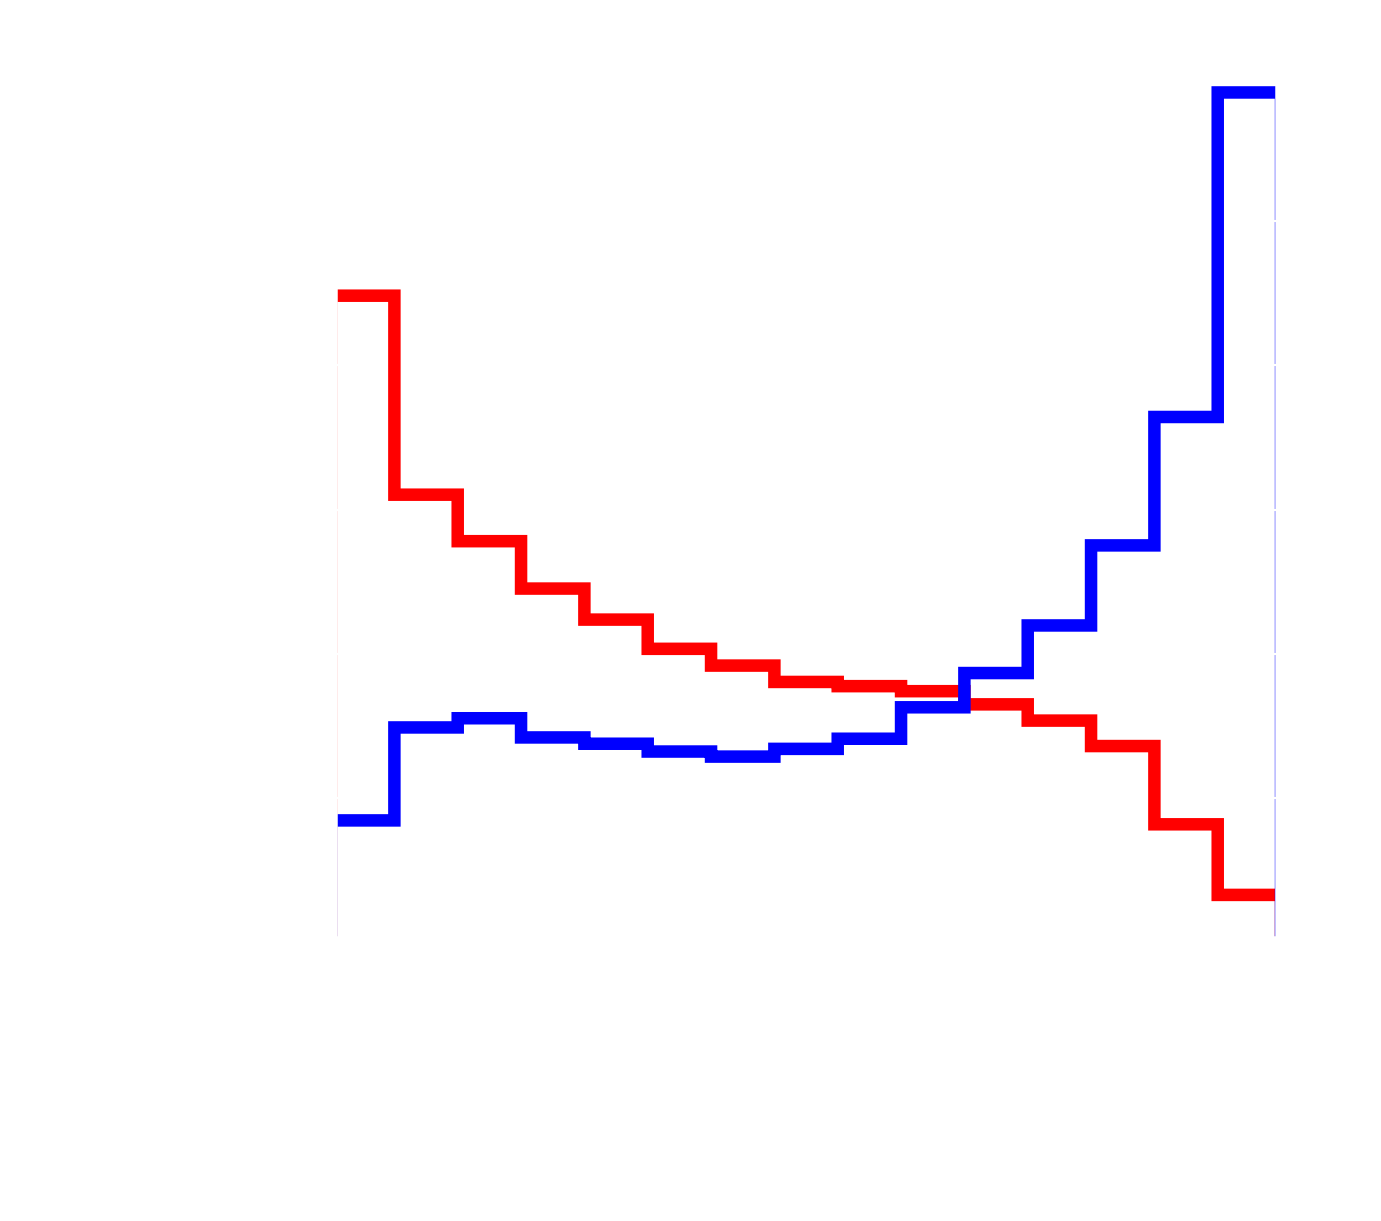

In [128]:
from prefig import Prefig
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')
Prefig(size=(5,4.5), axcol='w', fontcol='w')
P.hist(h[:,30].astype(float), histtype='step', color='r', bins=15, normed=True, linewidth=3)
P.hist(h[:,36].astype(float), histtype='step', color='b', bins=15, normed=True, linewidth=3)
P.xlabel('vote fraction')
P.ylabel('density')
P.tight_layout()
P.savefig('/Users/becky/Projects/presentations/nam2015/vote_fraction_histograms.png')